# Analysis 

We now perform the geometrical analyses over three different sets of prompts:

- Analysis of 10 prompts in a wide range of tokens (from 100 to 1000);
- Analysis of 10 prompts in a range of tokens around the total
embedding space dimension (768);
- Analysis of 10 prompts with the same number of tokens (100)
belonging to different semantic areas

In [1]:
# External classes
from BufferGeometry import BufferGeometry
from GeometryUtils import *

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la


import warnings
warnings.filterwarnings('ignore')

2025-07-14 15:36:12.320990: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-14 15:36:13.122964: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Test prompt
DA VALUTARE SE LASCIARE O MENO

In [2]:
volumes, gd, cos_sim, mean_vector, token_counts, rank_matrix = general_analysis("prompts.txt")
gd_heatmap = get_heatmap("prompts.txt")

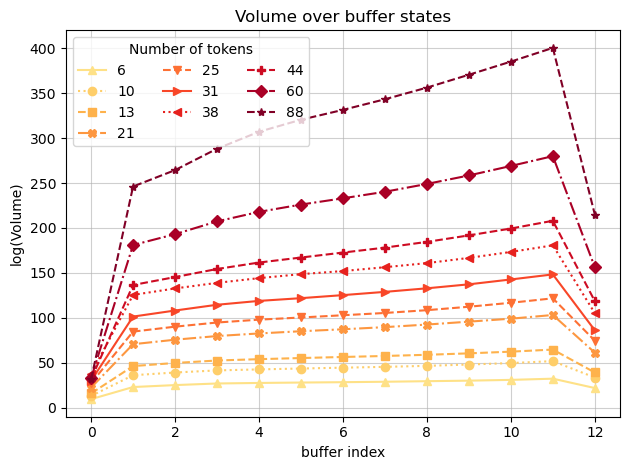

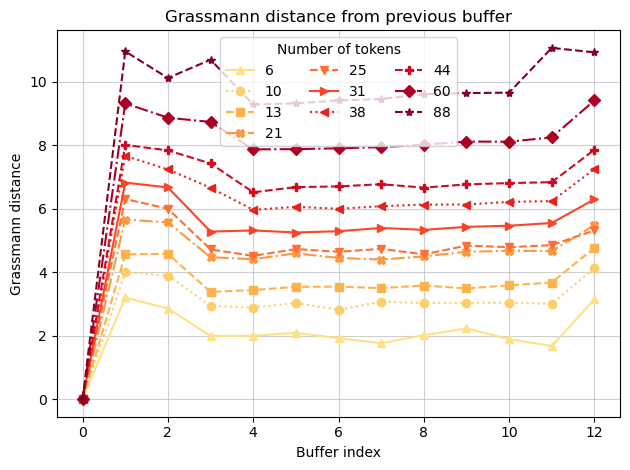

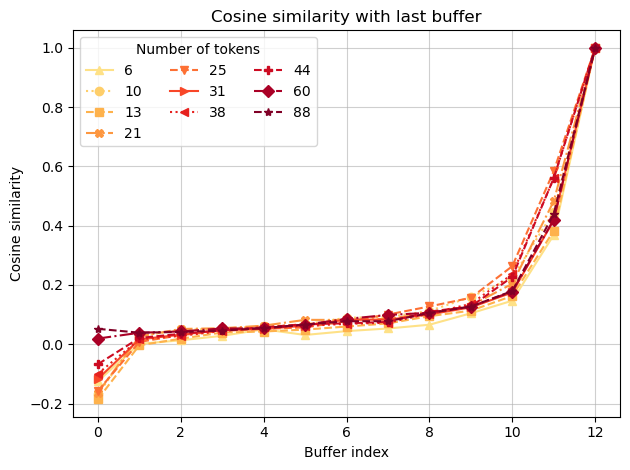

TypeError: PCA_plot() got an unexpected keyword argument 'n_components'

In [3]:
plot_geometry(volumes, token_counts, title="Volume over buffer states", xlabel="buffer index", ylabel="log(Volume)")
plot_geometry(gd, token_counts, title="Grassmann distance from previous buffer", xlabel="Buffer index", ylabel="Grassmann distance")
plot_geometry(cos_sim, token_counts, title="Cosine similarity with last buffer", xlabel="Buffer index", ylabel="Cosine similarity")

PCA_plot(mean_vector, token_counts, n_components=2)
PCA_plot(mean_vector, token_counts, n_components=3)

rank_plot(rank_matrix)

plot_heatmap(gd_heatmap)

## 100 to 1000 tokens prompts

In [4]:
#Compute the interested geometrical quantities
volumes, gd, cos_sim, mean_vector, token_counts, rank_matrix = general_analysis("ai_prompts_100_to_1000_tokens.txt")

#prepare data for the heatmap
gd_heatmap = get_heatmap("ai_prompts_100_to_1000_tokens.txt")

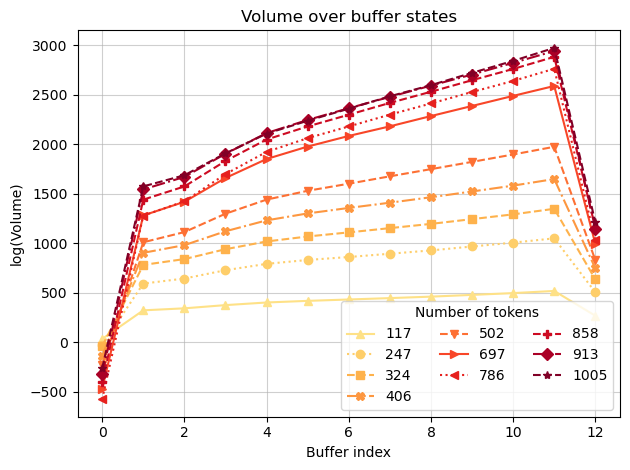

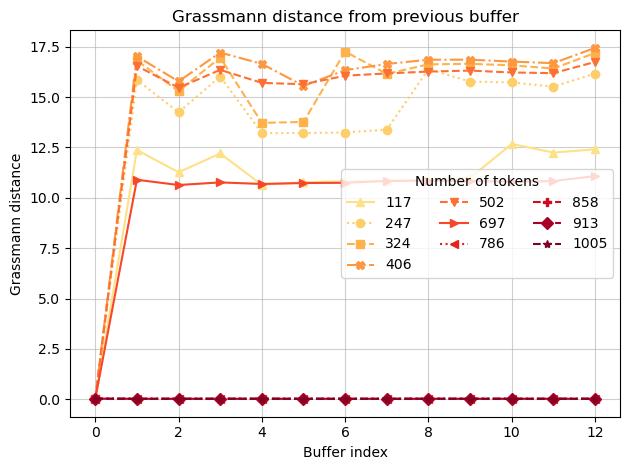

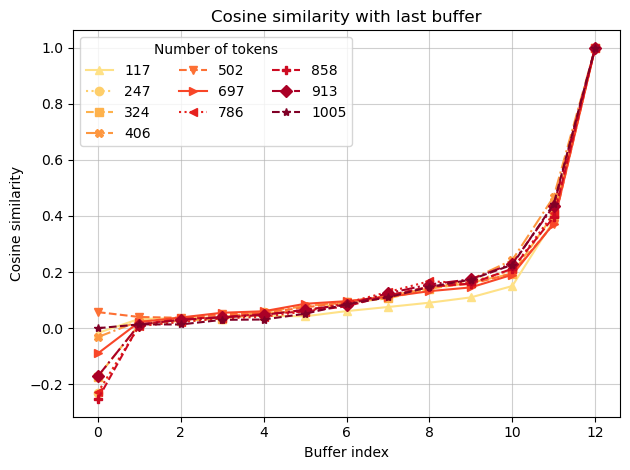

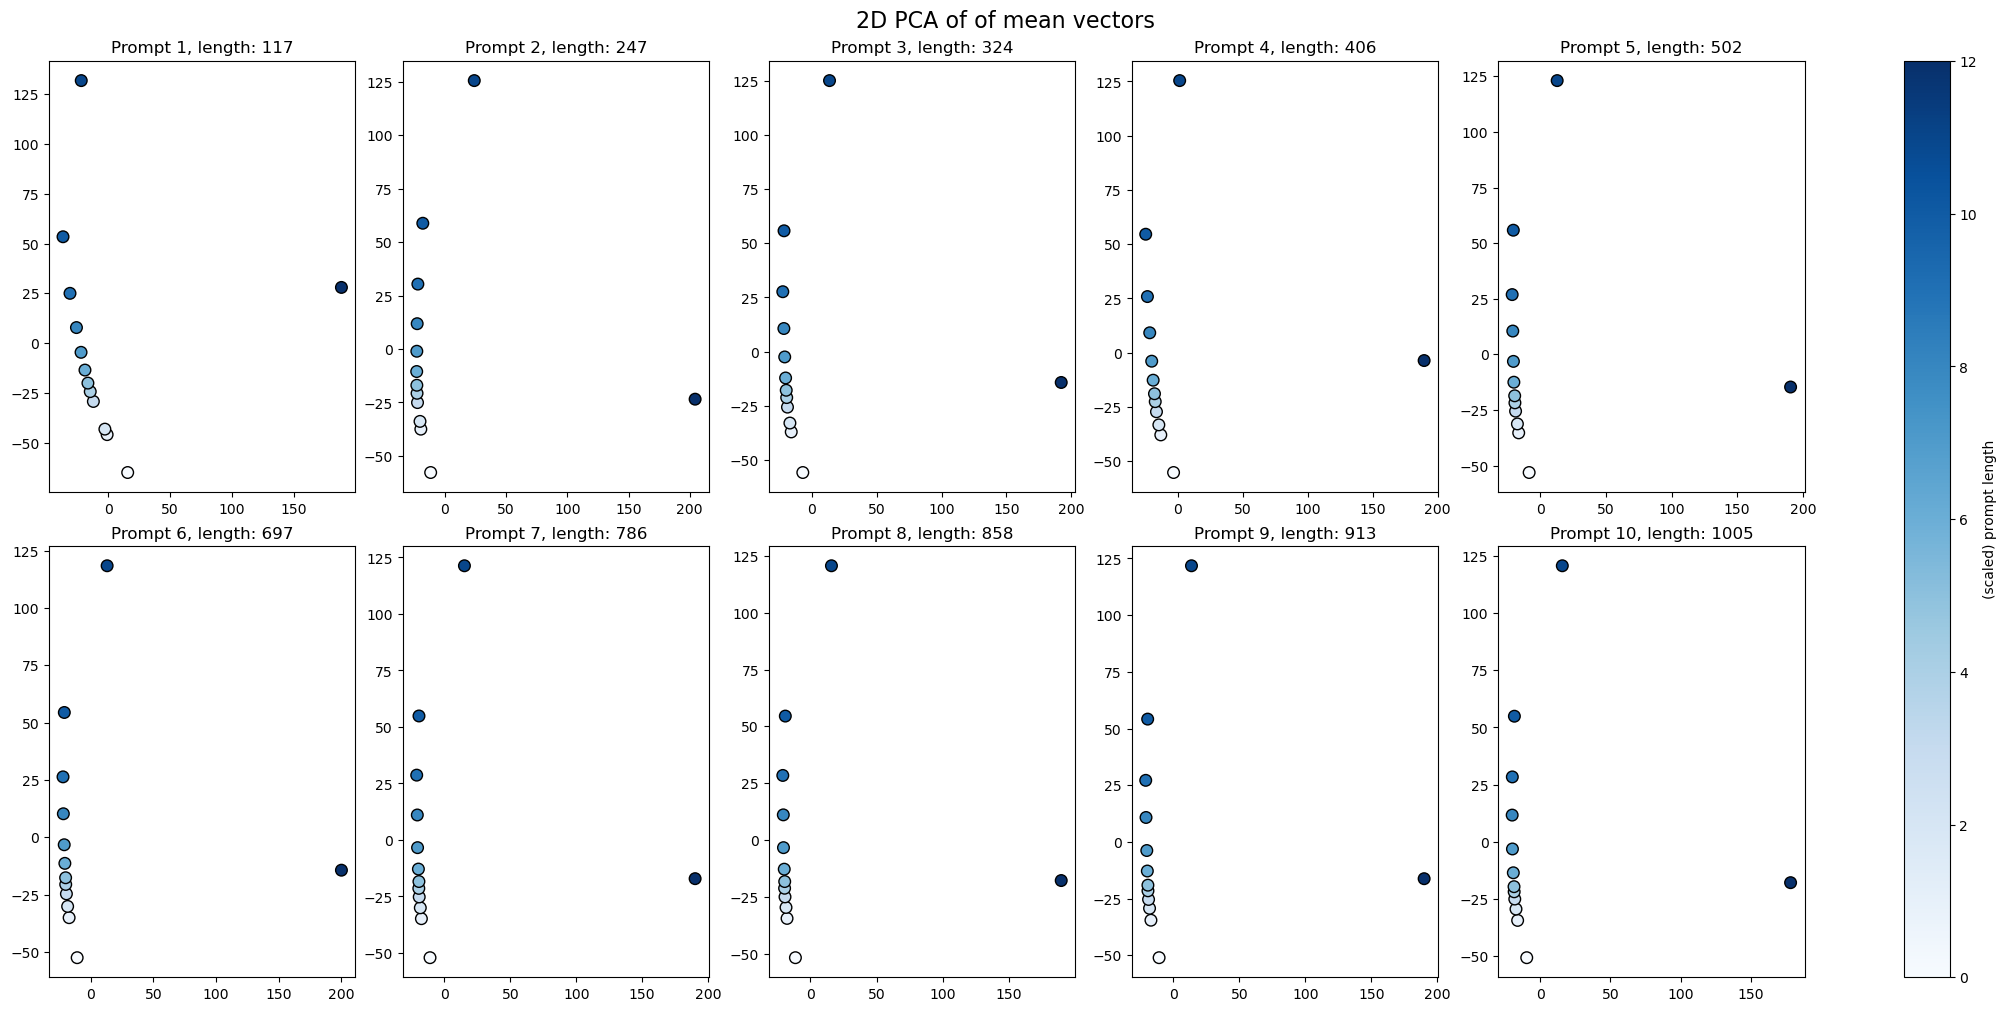

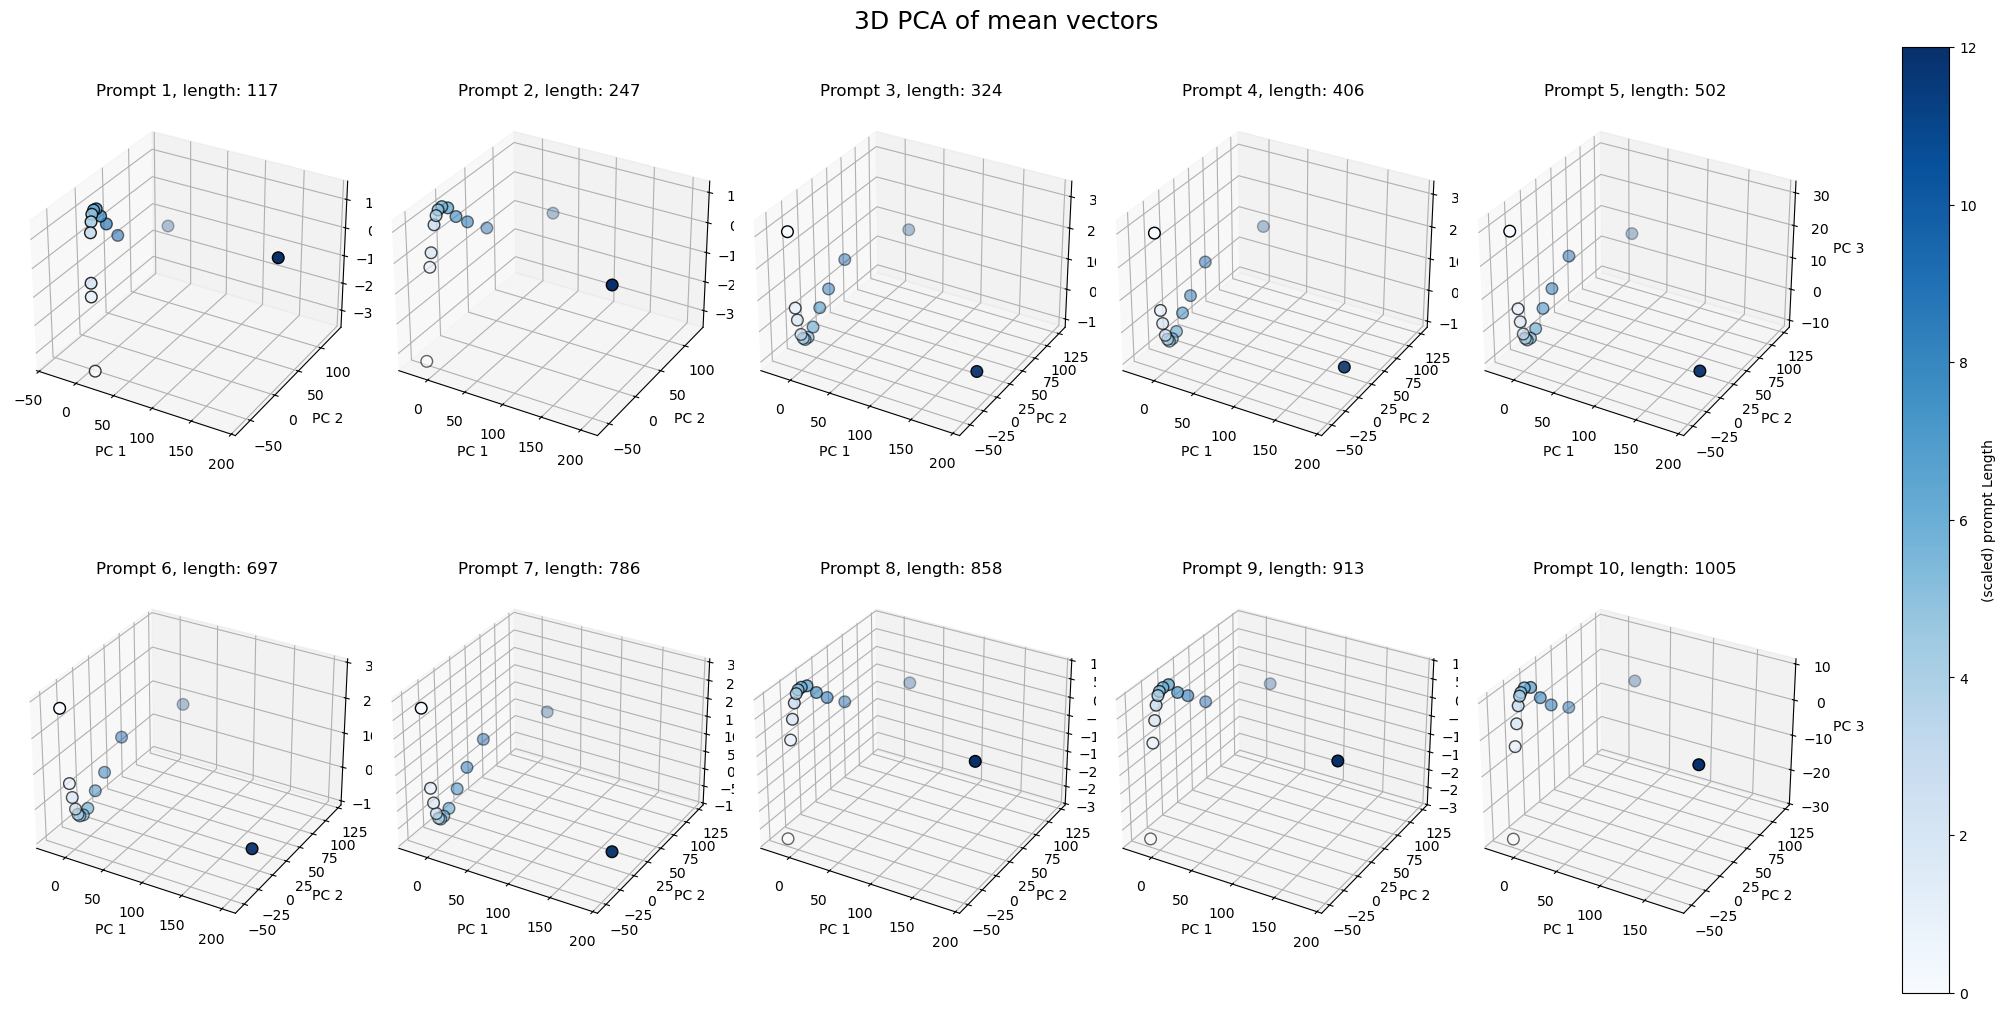

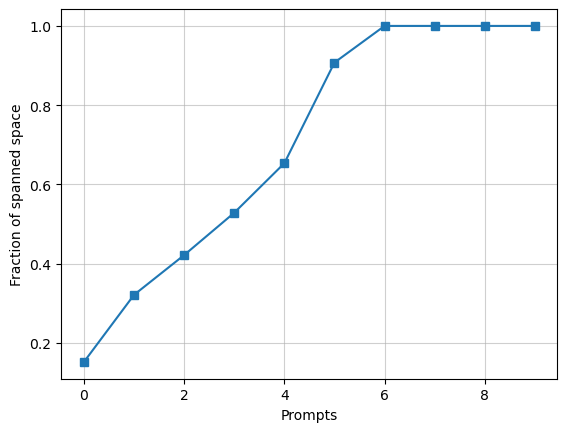

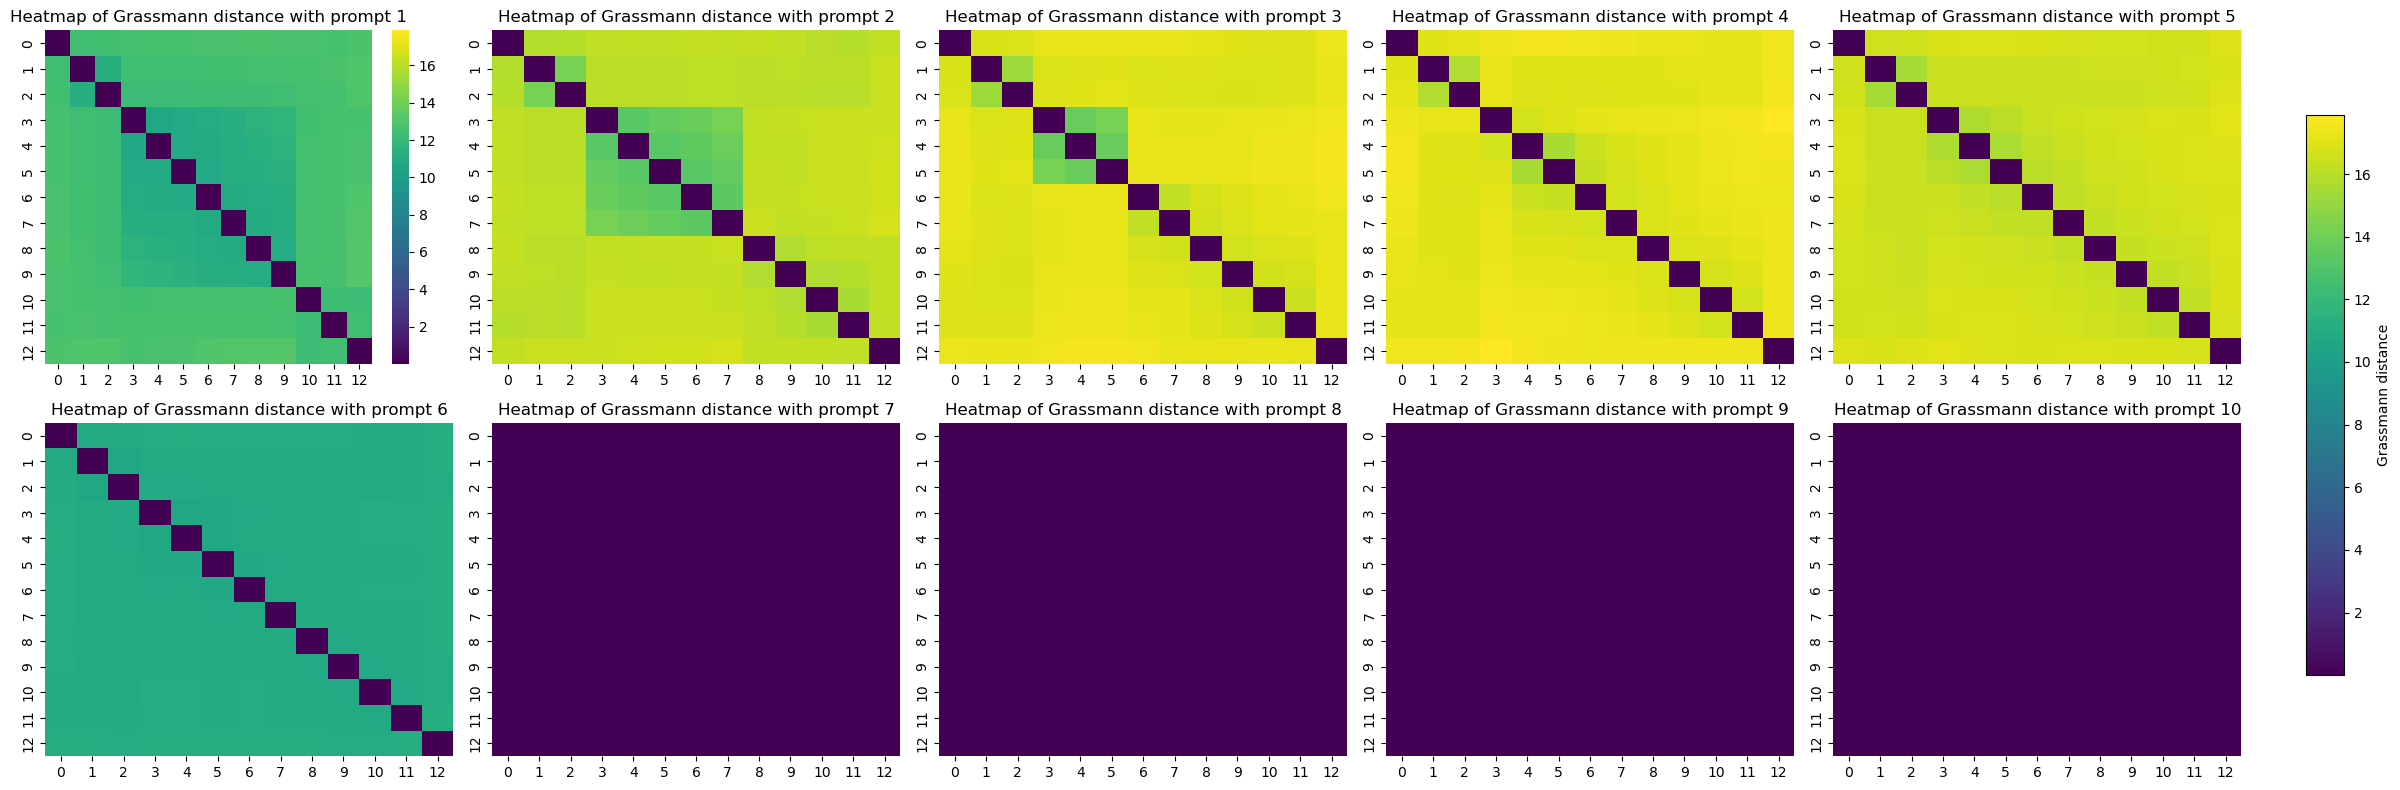

In [5]:
#Plot Volume, GD evolution and Cosine similarity
plot_geometry(volumes, token_counts, title="Volume over buffer states", xlabel="Buffer index", ylabel="log(Volume)")
plot_geometry(gd, token_counts, title="Grassmann distance from previous buffer", xlabel="Buffer index", ylabel="Grassmann distance")
plot_geometry(cos_sim, token_counts, title="Cosine similarity with last buffer", xlabel="Buffer index", ylabel="Cosine similarity")

#Plot mean vector evolution
PCA_plot(mean_vector, token_counts)
PCA_plot_3d(mean_vector, token_counts)

#Plot the fraction of explored space
rank_plot(rank_matrix)

#Plot the GD heatmap
plot_heatmap(gd_heatmap)

# (Close to) 768 tokens prompts

In [6]:
#Compute the interested geometrical quantities
volumes, gd, cos_sim, mean_vector, token_counts, rank_matrix = general_analysis("prompts_768.txt")

#prepare data for the heatmap
gd_heatmap = get_heatmap("prompts_768.txt")

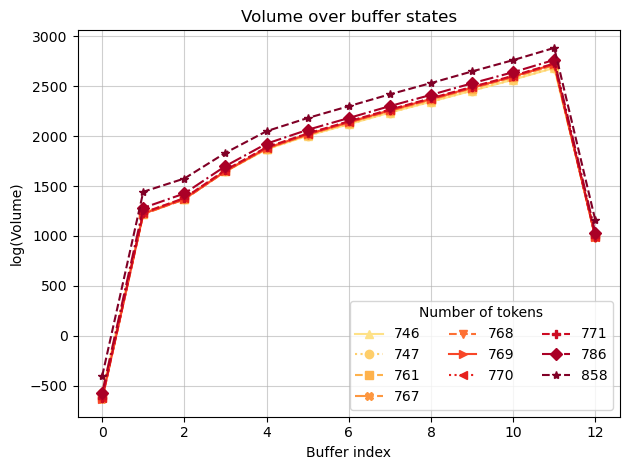

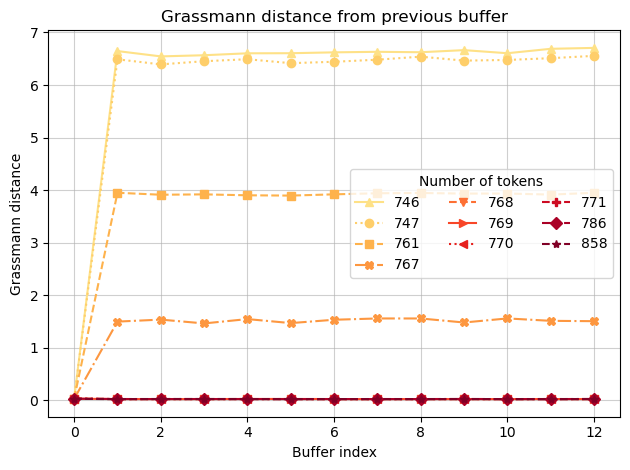

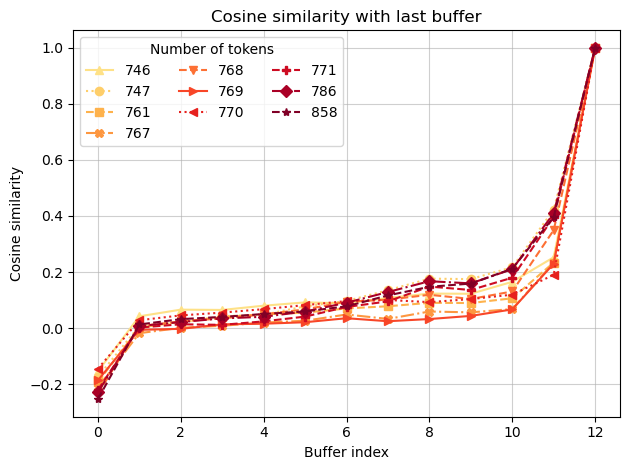

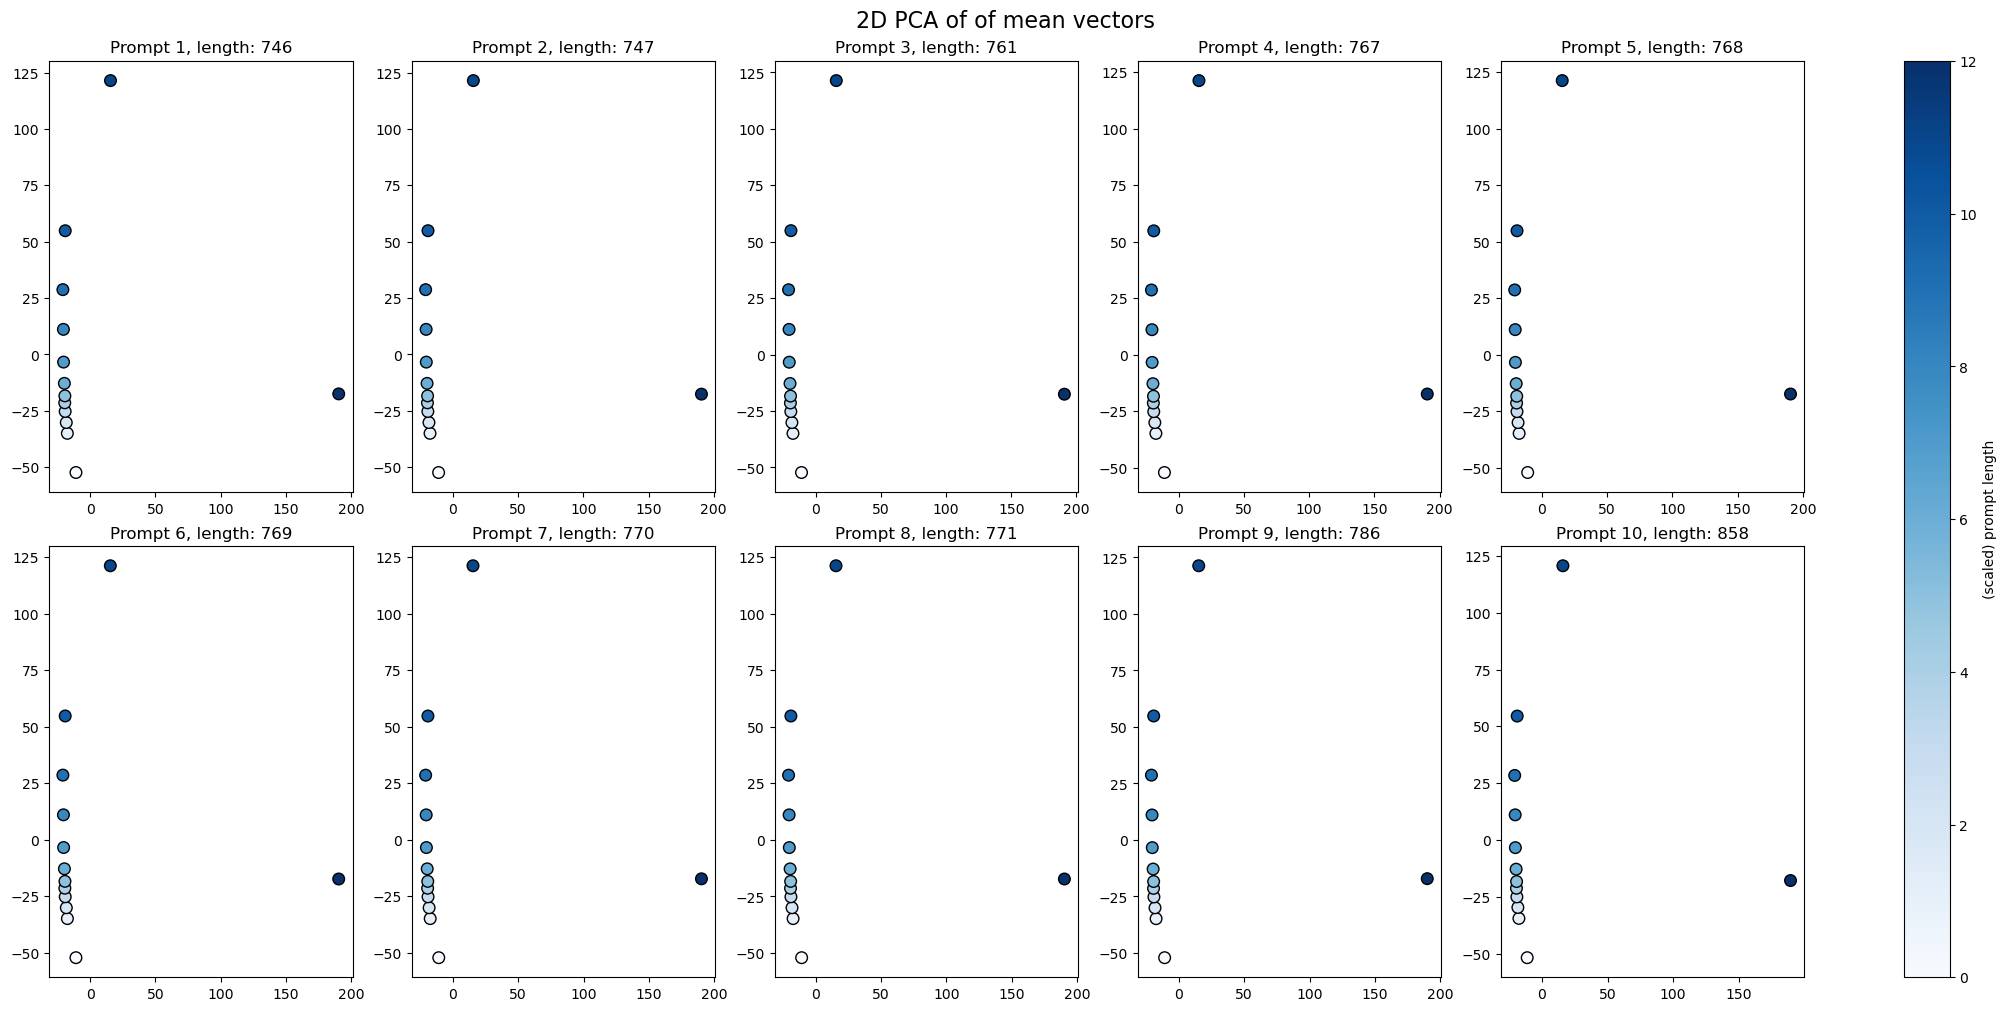

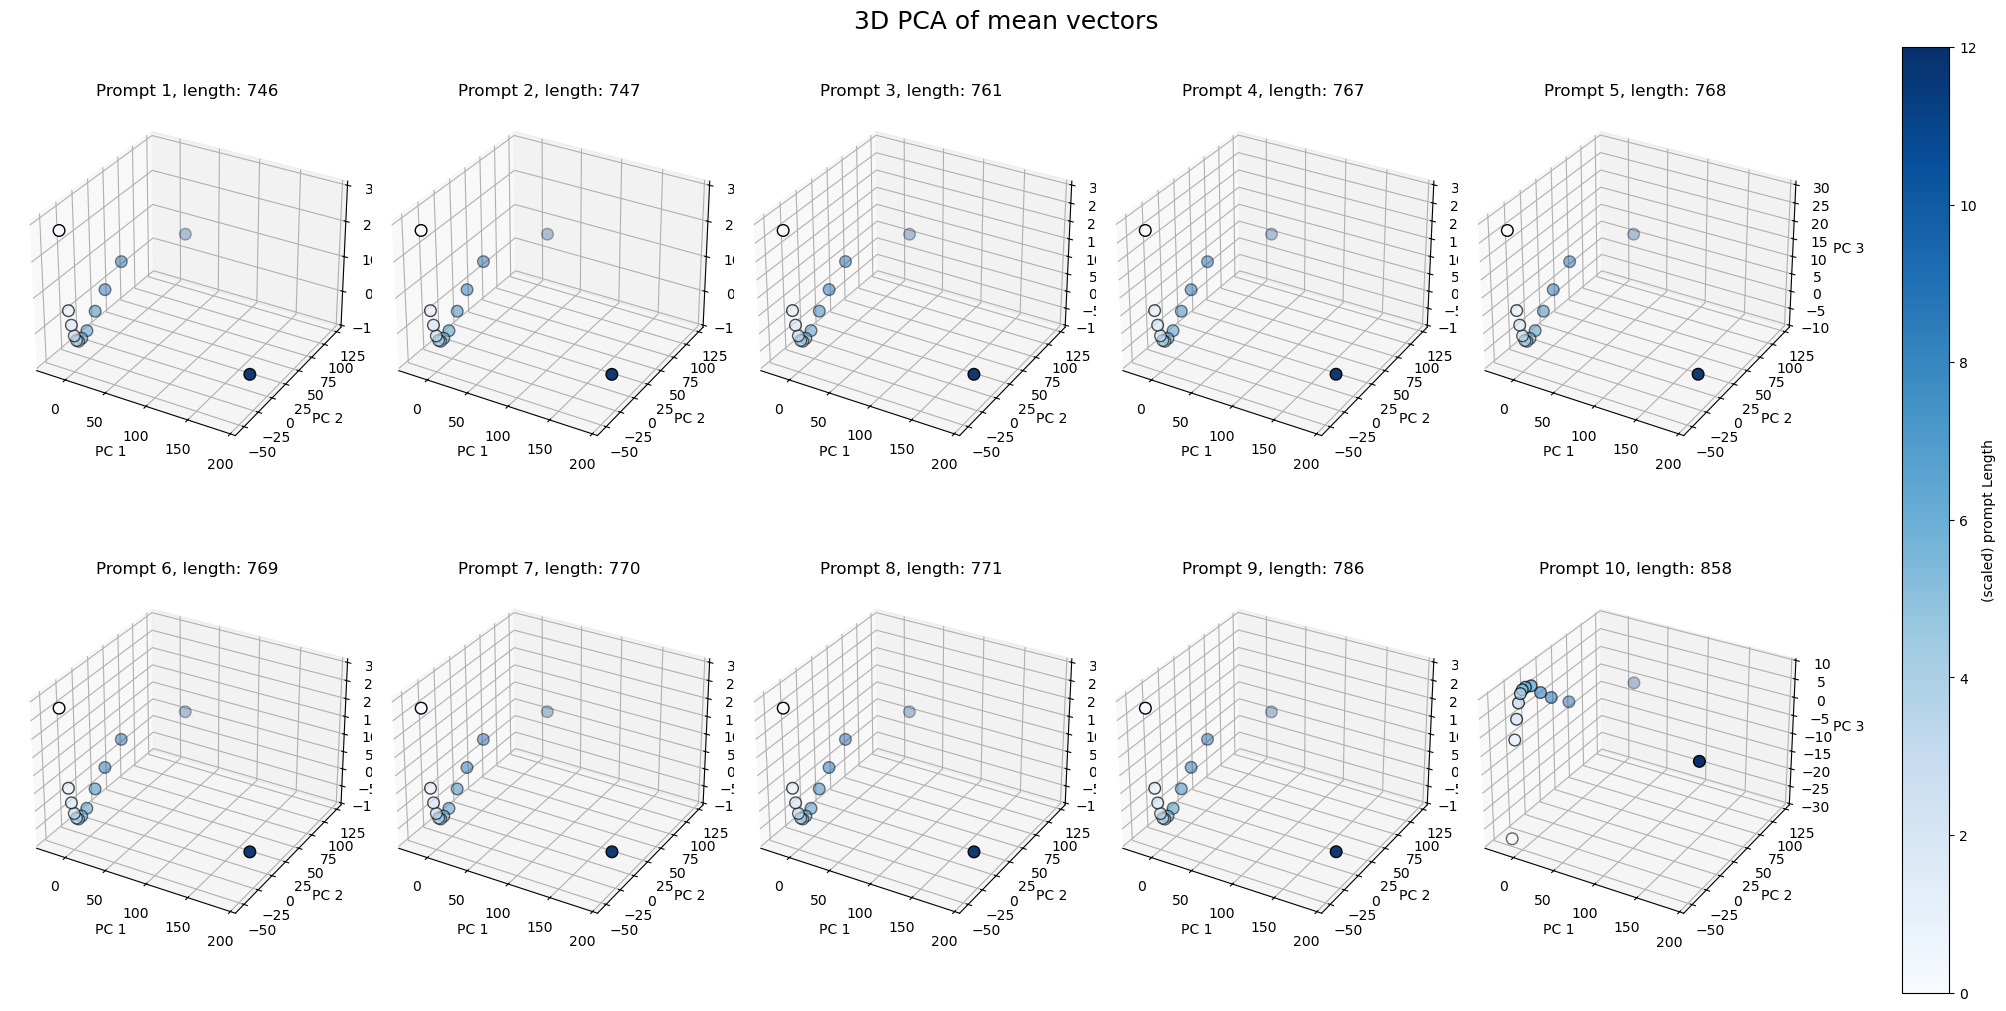

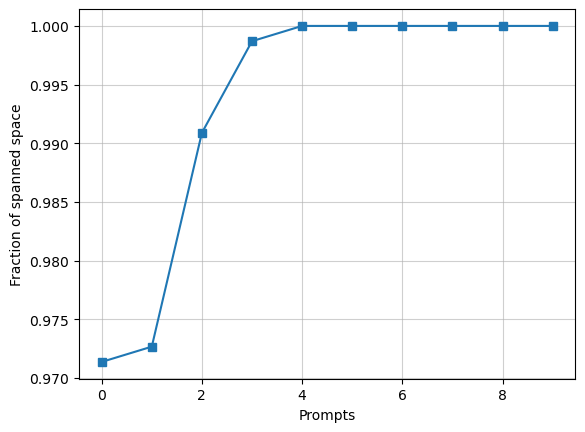

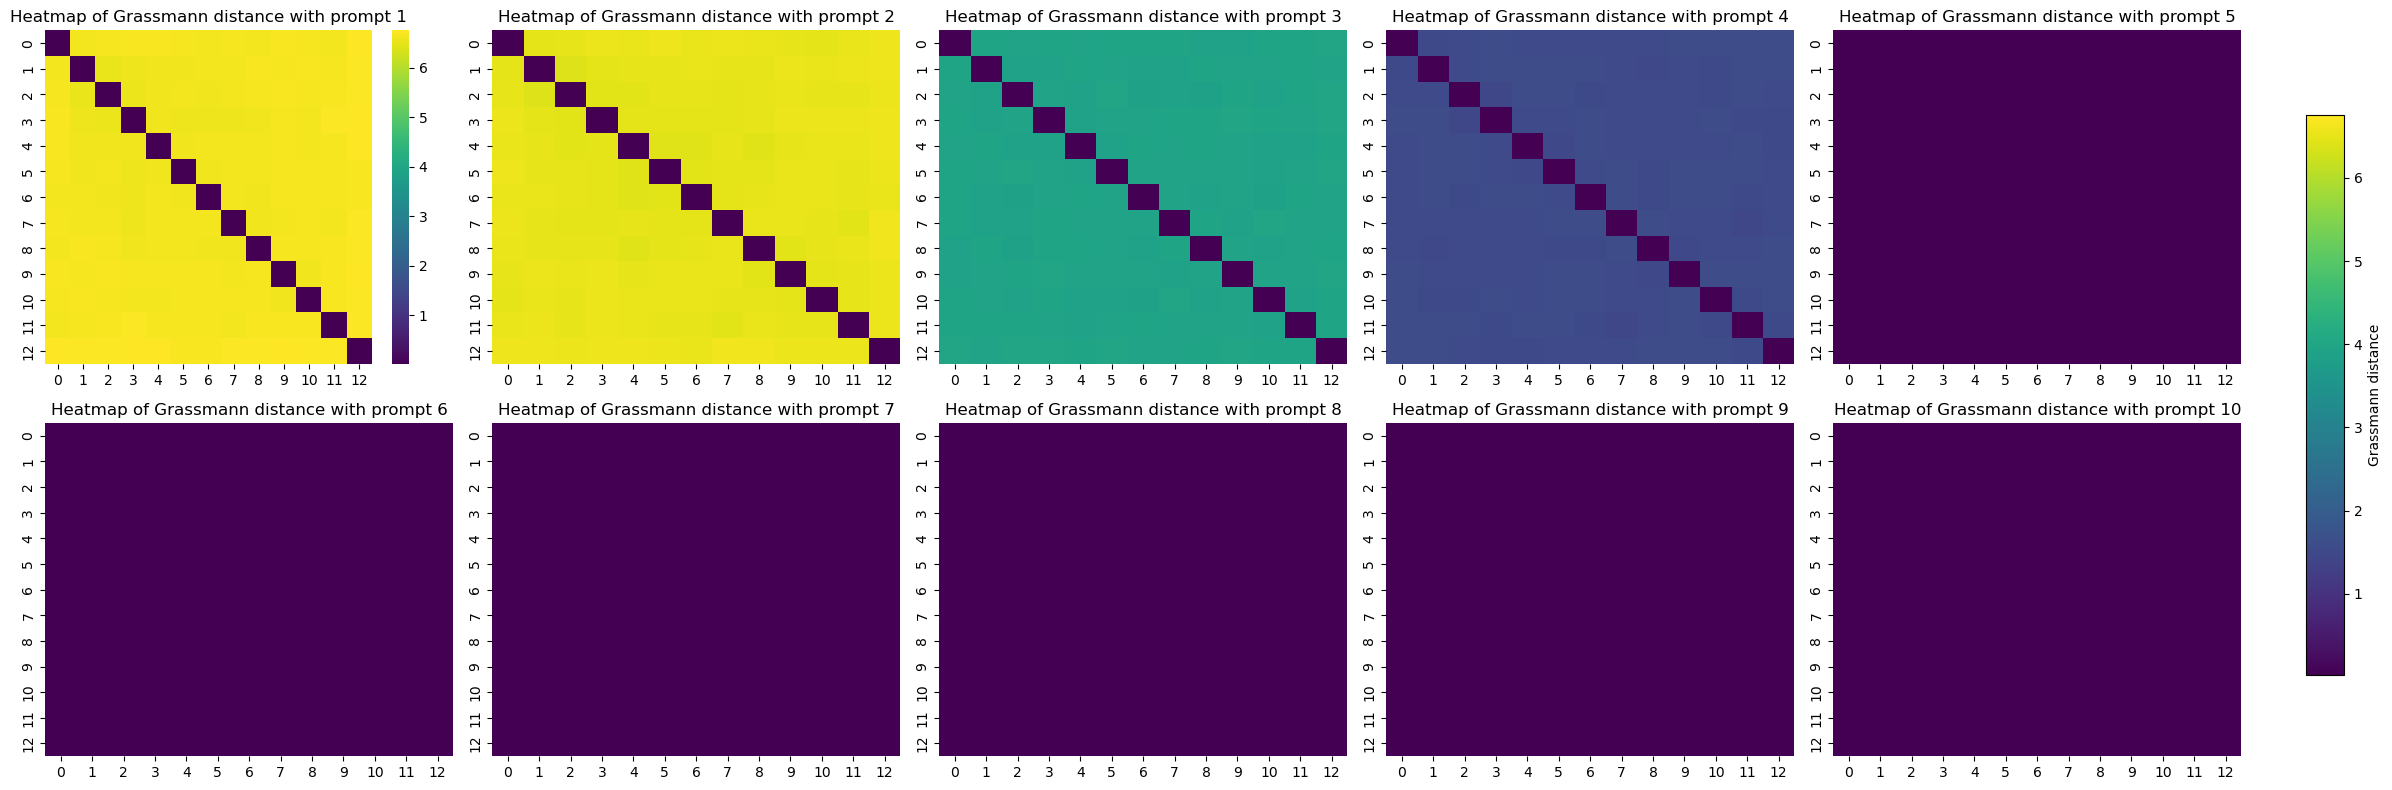

In [7]:
#Plot Volume, GD evolution and Cosine similarity
plot_geometry(volumes, token_counts, title="Volume over buffer states", xlabel="Buffer index", ylabel="log(Volume)")
plot_geometry(gd, token_counts, title="Grassmann distance from previous buffer", xlabel="Buffer index", ylabel="Grassmann distance")
plot_geometry(cos_sim, token_counts, title="Cosine similarity with last buffer", xlabel="Buffer index", ylabel="Cosine similarity")

#Plot mean vector evolution
PCA_plot(mean_vector, token_counts)
PCA_plot_3d(mean_vector, token_counts)

#Plot the fraction of explored space
rank_plot(rank_matrix)

#Plot the GD heatmap
plot_heatmap(gd_heatmap)

## Search for phase transition across rank = 768

We now want to see better the transition of the average Grassmann Distance when the number of token involved is bigger than the embeddind dimension:

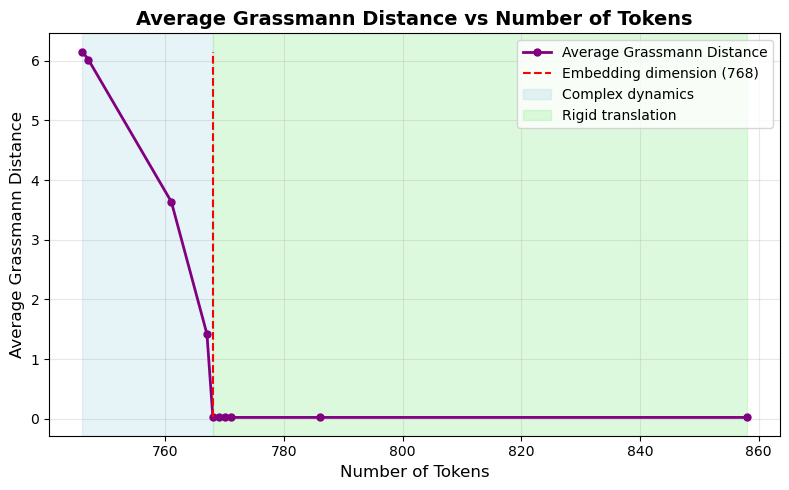

In [8]:
gd_avg = np.mean(gd_heatmap, axis=(1,2))

plt.figure(figsize=(8,5))
plt.plot(token_counts, gd_avg, marker='o', linestyle='-', color='purple', linewidth=2, markersize=5, label = 'Average Grassmann Distance')
plt.title('Average Grassmann Distance vs Number of Tokens', fontsize=14, fontweight='bold')
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Average Grassmann Distance', fontsize=12)
plt.grid(alpha=0.3)

# Vertical line at 768
plt.vlines(ymax = np.max(gd_avg), ymin = np.min(gd_avg), x = 768, linestyle = 'dashed', color = 'red', label = 'Embedding dimension (768)')

# Shaded regions
plt.axvspan(min(token_counts), 768, color='lightblue', alpha=0.3, label='Complex dynamics')
plt.axvspan(768, max(token_counts), color='lightgreen', alpha=0.3, label='Rigid translation')

plt.legend()
plt.tight_layout()
plt.show()

## Different context prompts

In [9]:
#Compute the interested geometrical quantities
volumes, gd, cos_sim, mean_vector, token_counts, rank_matrix = general_analysis("different_topics_prompts.txt")

#prepare data for the heatmap
gd_heatmap = get_heatmap("different_topics_prompts.txt")

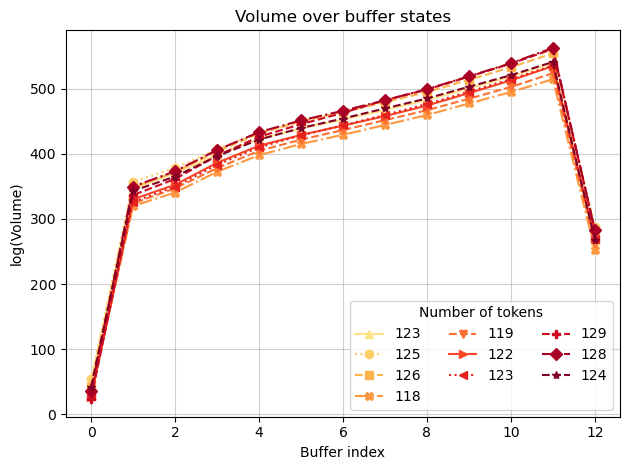

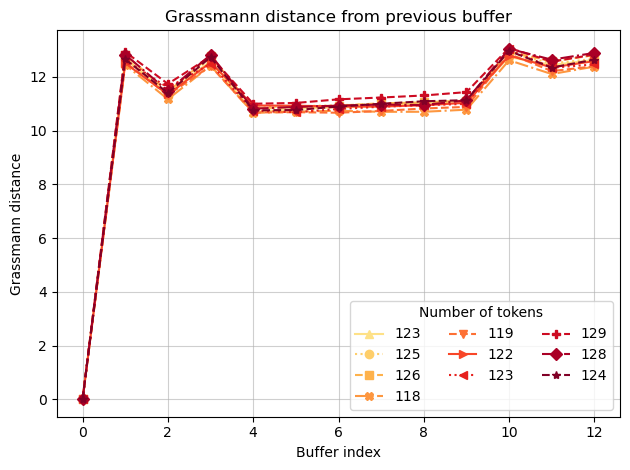

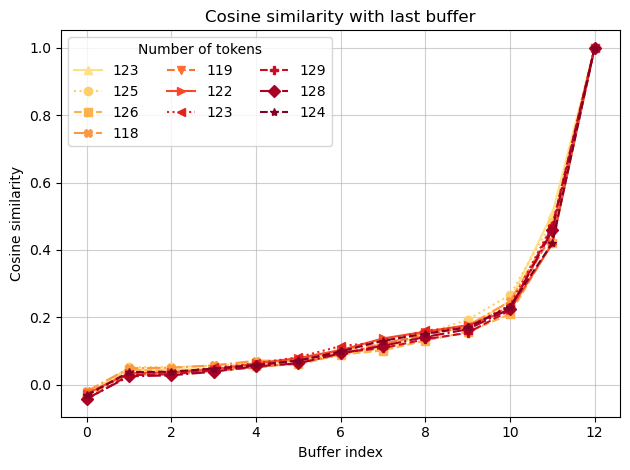

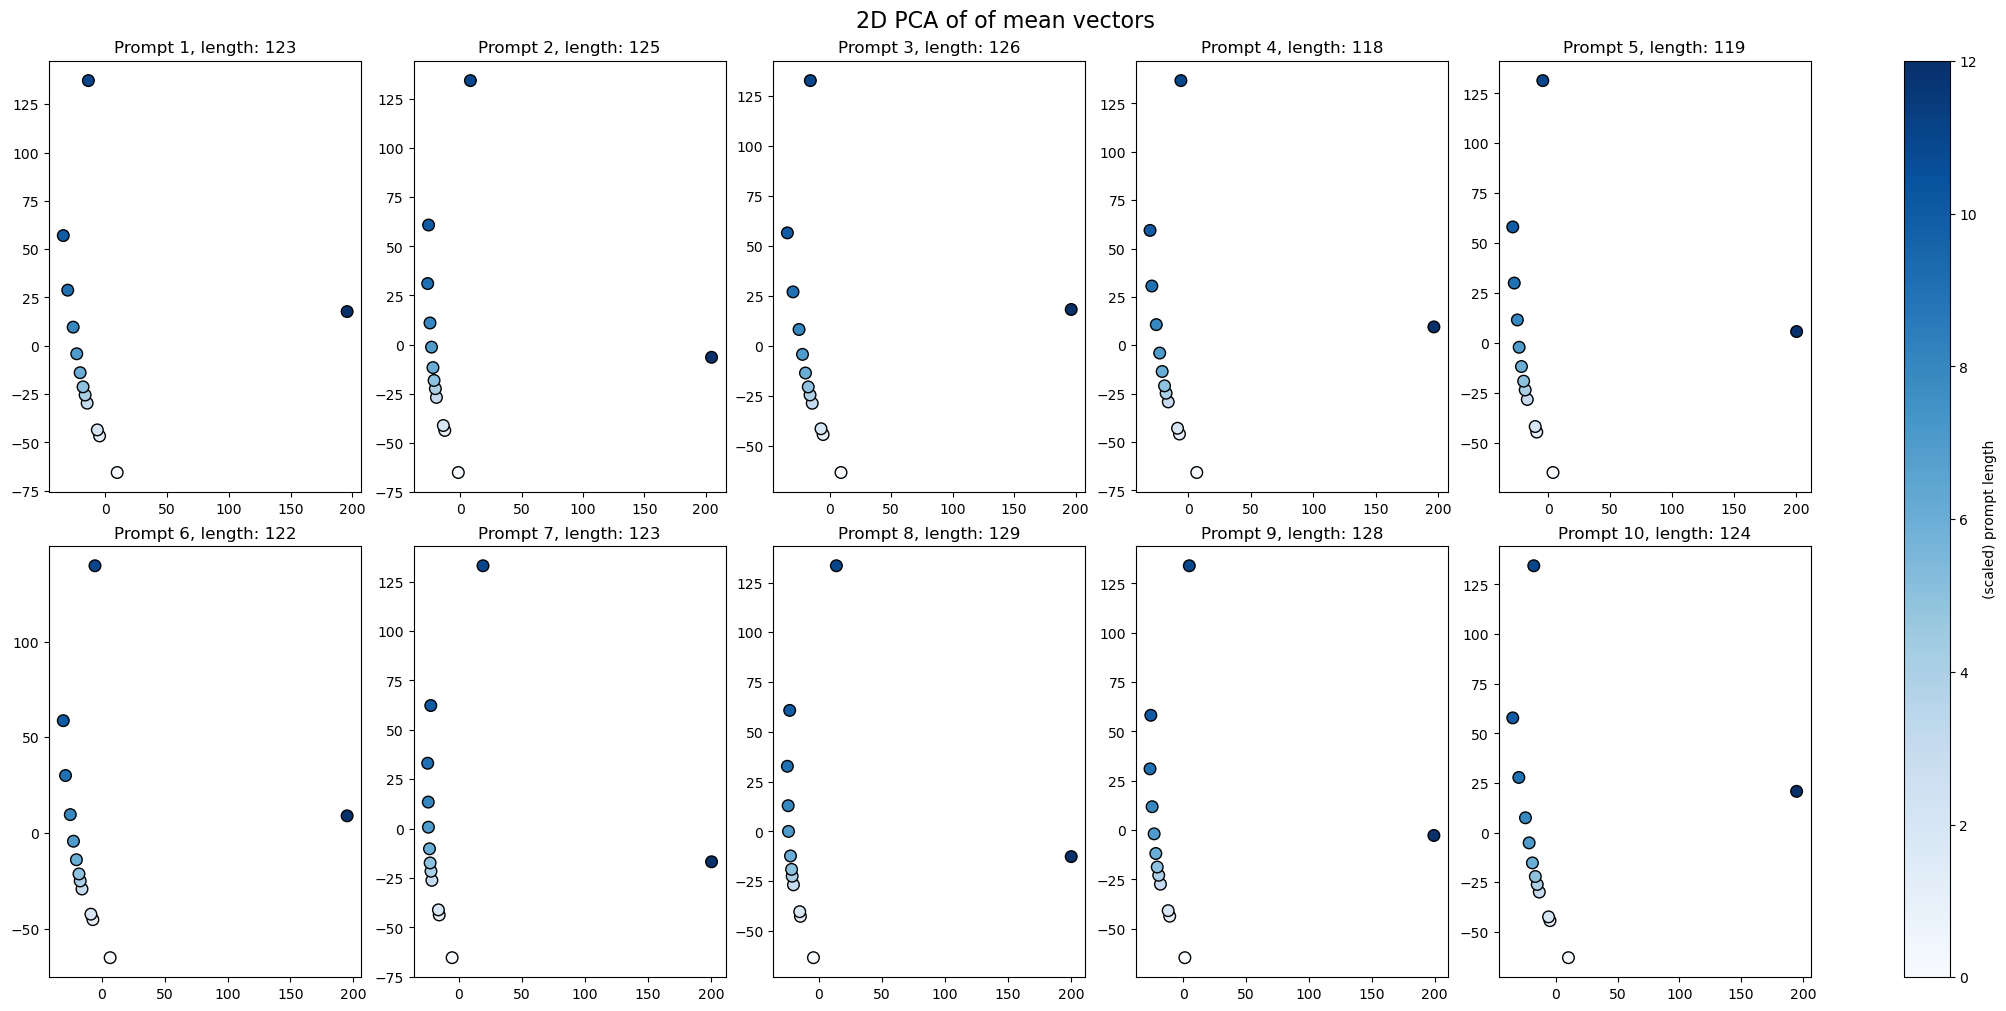

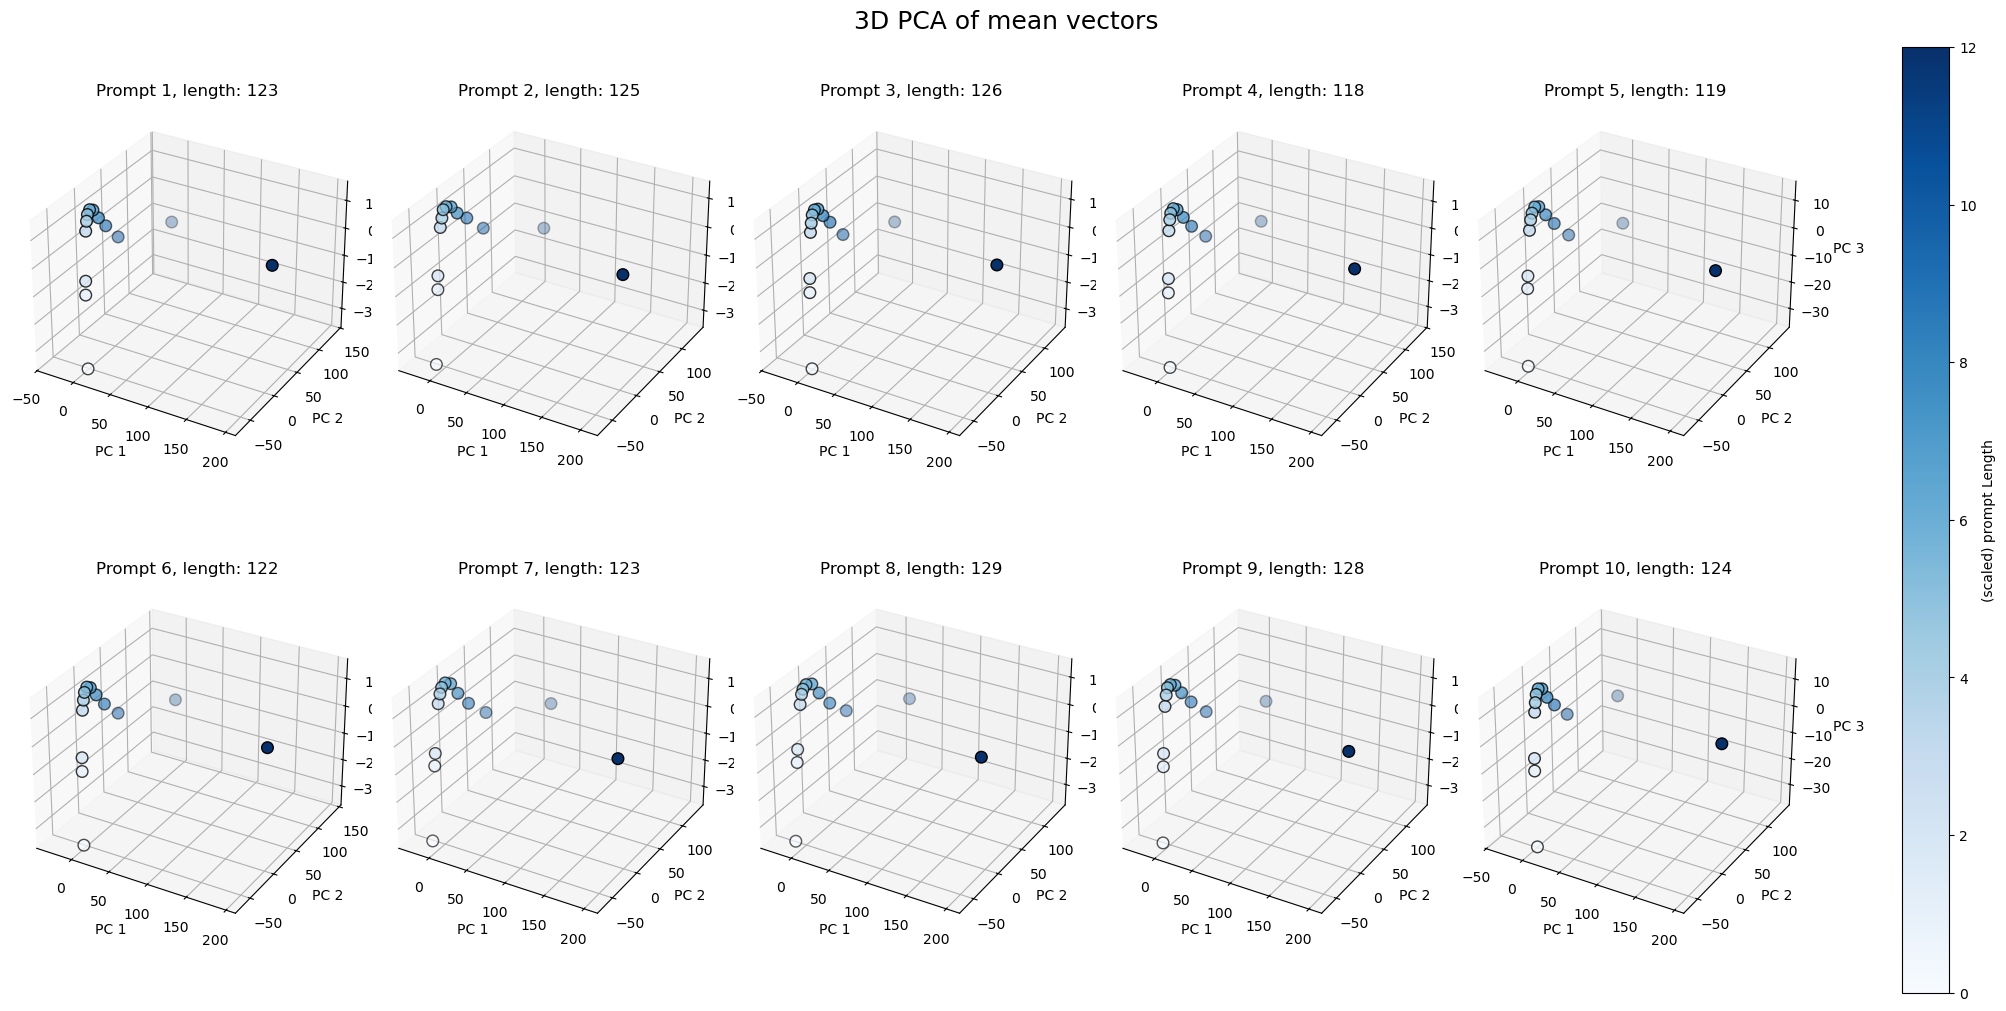

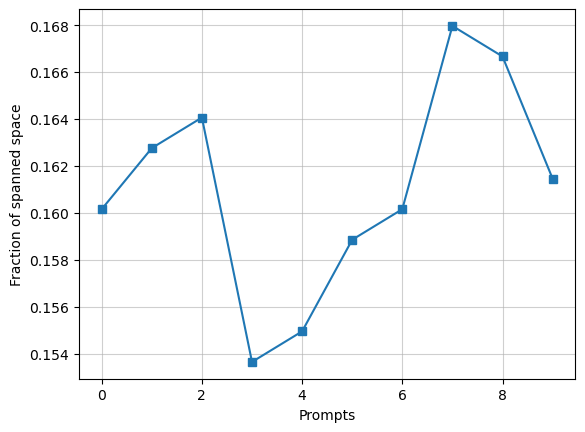

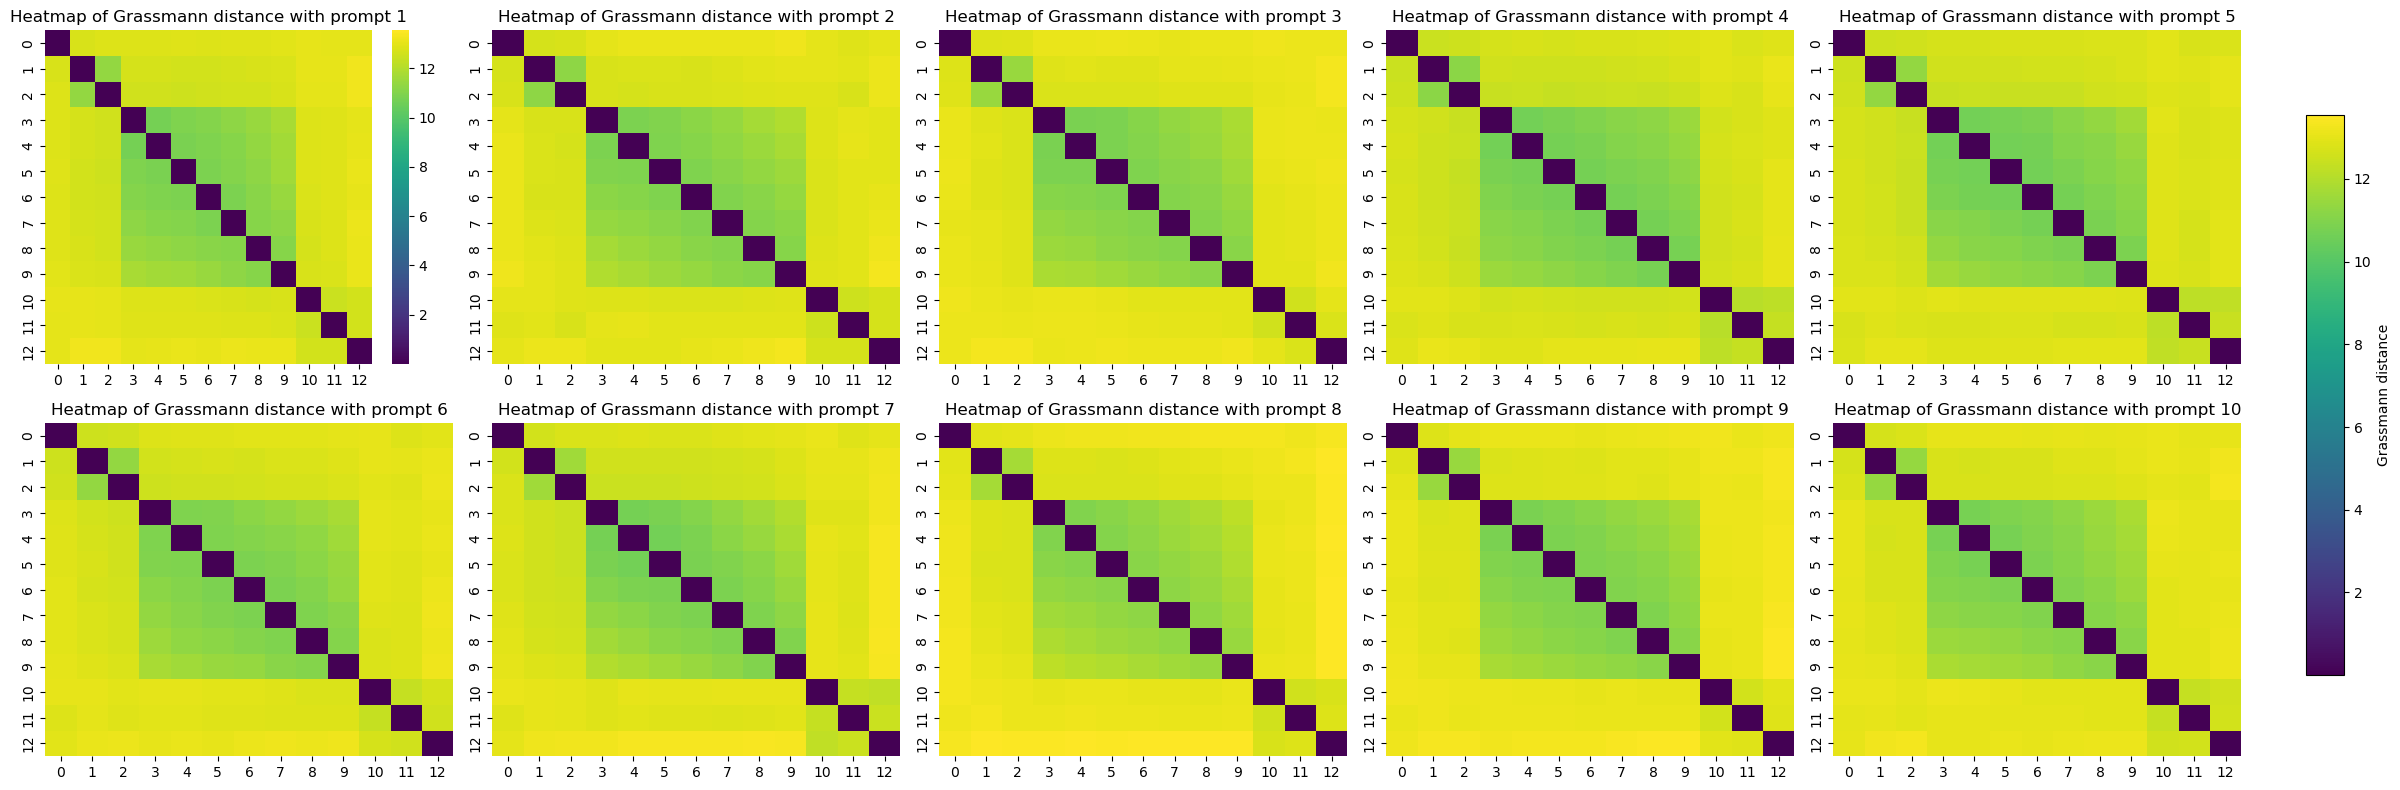

In [10]:
#Plot Volume, GD evolution and Cosine similarity
plot_geometry(volumes, token_counts, title="Volume over buffer states", xlabel="Buffer index", ylabel="log(Volume)")
plot_geometry(gd, token_counts, title="Grassmann distance from previous buffer", xlabel="Buffer index", ylabel="Grassmann distance")
plot_geometry(cos_sim, token_counts, title="Cosine similarity with last buffer", xlabel="Buffer index", ylabel="Cosine similarity")

#Plot mean vector evolution
PCA_plot(mean_vector, token_counts)
PCA_plot_3d(mean_vector, token_counts)

#Plot the fraction of explored space
rank_plot(rank_matrix)

#Plot the GD heatmap
plot_heatmap(gd_heatmap)